In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('precision', 5)

In [2]:
wind = pd.read_csv('powerproduction.txt')
wind

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
wind.columns

Index(['speed', 'power'], dtype='object')

In [4]:
wind.shape

(500, 2)

In [5]:
wind.isna().sum()

speed    0
power    0
dtype: int64

In [6]:
wind.isnull().sum()

speed    0
power    0
dtype: int64

In [7]:
wind.describe()

,speed,power
count,500.00000,500.00000
mean,12.59040,48.01458
std,7.22499,41.61457
min,0.00000,0.00000
25%,6.32475,5.28800
50%,12.55050,41.64550
75%,18.77525,93.53700
max,25.00000,113.55600


In [8]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


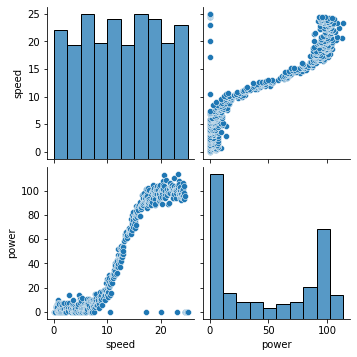

In [9]:
sns.pairplot(wind);

Seems to be some outliers here. I think its reasonable to assume that if the turbine was functioning porperly, there would be power output. So I will assume that these zero values for power, were for times when the turbine was offline due to maintenance or was malfunctioning.

In [10]:
wind = wind[wind['power'] != 0.000]

In [11]:
wind.describe()

,speed,power
count,451.00000,451.00000
mean,13.00430,53.23125
std,6.83598,40.52205
min,0.32500,0.06700
25%,7.34450,8.54350
50%,13.03800,58.16800
75%,18.78150,94.72550
max,24.39900,113.55600


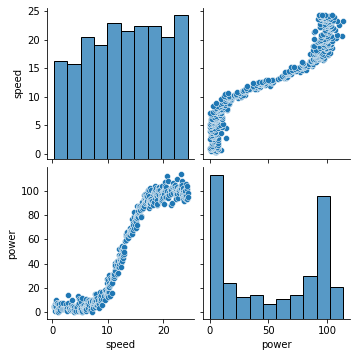

In [12]:
sns.pairplot(wind);

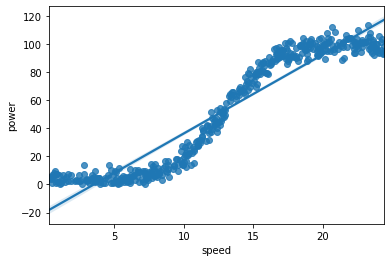

In [13]:
sns.regplot(x="speed", y="power", data=wind);

In [14]:
import sklearn.linear_model as lin

x = wind["speed"].to_numpy()
y = wind["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [15]:
r

0.8984832870534454

In [16]:
p

[-19.837685452108396, 5.618827837778541]

In [17]:
def f(x, p):
    return p[0] + x * p[1]

In [18]:
f(13,p)

53.207076439012646

In [19]:
def predict(x):
    return f(x,p)

In [20]:
predict(13)

53.207076439012646

In [21]:
predict(17.5)

78.49180170901607

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
x = wind["speed"].to_numpy()
y = wind["power"].to_numpy()

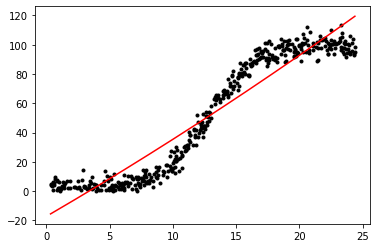

In [24]:
a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'r-');

In [25]:
a, b, c , d = np.polyfit(x, y, 3)

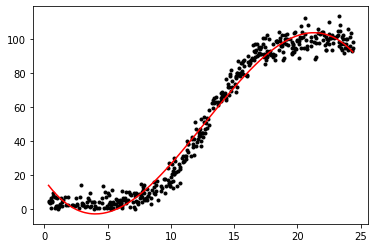

In [26]:
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x *x  +  c * x + d, 'r-');

In [81]:
16018.47640311/len(x)

35.517686037937914

In [80]:
# https://stackoverflow.com/questions/15721053/whats-the-error-of-numpy-polyfit
np.polyfit(x, y, 3,full=True)

(array([ -0.04123923,   1.56792966, -10.62809064,  17.43400076]),
 array([16018.47640311]),
 4,
 array([1.90199728, 0.60004313, 0.14809888, 0.02052572]),
 1.0014211682118912e-13)

In [28]:
import tensorflow.keras as kr

In [50]:
model = kr.models.Sequential()

In [54]:
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [55]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 3ms/step - loss: 4212.2471
Epoch 2/500
46/46 [==============================] - 0s 4ms/step - loss: 4180.3545
Epoch 3/500
46/46 [==============================] - 0s 4ms/step - loss: 4149.1260
Epoch 4/500
46/46 [==============================] - 0s 4ms/step - loss: 4118.0835
Epoch 5/500
46/46 [==============================] - 0s 4ms/step - loss: 4087.0701
Epoch 6/500
46/46 [==============================] - 0s 7ms/step - loss: 4056.6033
Epoch 7/500
46/46 [==============================] - 0s 5ms/step - loss: 4026.5730
Epoch 8/500
46/46 [==============================] - 0s 5ms/step - loss: 3997.0017
Epoch 9/500
46/46 [==============================] - 0s 4ms/step - loss: 3967.2683
Epoch 10/500
46/46 [==============================] - 0s 5ms/step - loss: 3938.1765
Epoch 11/500
46/46 [==============================] - 0s 4ms/step - loss: 3908.9927
Epoch 12/500
46/46 [==============================] - 0s 3ms/step - loss: 3880.5295
E

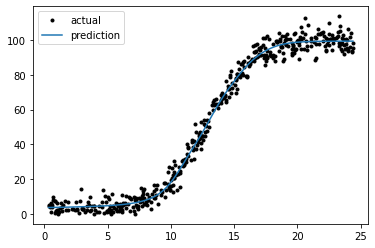

In [56]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.predict(np.array([1.5]))

array([[3.9004955]], dtype=float32)

In [59]:
model.evaluate(x, y)

15/15 [==============================] - 0s 6ms/step - loss: 16.5256


16.525630950927734

In [66]:
#model_json = model.to_json()

In [67]:
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)

In [68]:
#model.save_weights("model.h5")

In [60]:
model.save_weights("wind_power_weights.h5")
model.save('wind_power.h5')

In [61]:
from tensorflow.keras.models import load_model
new_model = load_model('wind_power.h5')

In [62]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [63]:
score = new_model.evaluate(x, y,)
score

15/15 [==============================] - 0s 2ms/step - loss: 16.5256


16.525630950927734

In [64]:
new_model.predict([1.5])

array([[3.9004955]], dtype=float32)

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [71]:
an_model = kr.models.Sequential()
an_model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
an_model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
an_model.compile('adam', loss='mean_squared_error')

In [73]:
an_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=500, batch_size=10)

Epoch 1/500
36/36 [==============================] - 0s 13ms/step - loss: 4225.2471 - val_loss: 5070.3501
Epoch 2/500
36/36 [==============================] - 0s 4ms/step - loss: 4183.4326 - val_loss: 5018.4824
Epoch 3/500
36/36 [==============================] - 0s 5ms/step - loss: 4136.2979 - val_loss: 4959.8071
Epoch 4/500
36/36 [==============================] - 0s 6ms/step - loss: 4084.0757 - val_loss: 4895.6279
Epoch 5/500
36/36 [==============================] - 0s 6ms/step - loss: 4028.0869 - val_loss: 4830.7622
Epoch 6/500
36/36 [==============================] - 0s 5ms/step - loss: 3973.2161 - val_loss: 4765.7998
Epoch 7/500
36/36 [==============================] - 0s 6ms/step - loss: 3911.4792 - val_loss: 4687.9375
Epoch 8/500
36/36 [==============================] - 0s 6ms/step - loss: 3851.0129 - val_loss: 4628.0693
Epoch 9/500
36/36 [==============================] - 0s 4ms/step - loss: 3805.3950 - val_loss: 4580.1030
Epoch 10/500
36/36 [==============================] - 